In [ ]:
## read in important libraries
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn import preprocessing
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
## example of reading in one of our datasets
### Read in the base FIPS code dataset and drop Puerto Rico

url = 'covid_community_vulnerability/data/FIPS.csv'
FIPS_codes = pd.read_csv(url, usecols=['FIPS','County','State','Merge'])
FIPS_codes=FIPS_codes[FIPS_codes['State']!='Puerto Rico']
#FIPS_codes['FIPS']=FIPS_codes['FIPS'].apply(fips_zeros)
FIPS_codes.head()

,FIPS,State,County,Merge
0,1001,Alabama,Autauga County,Alabama Autauga County
1,1003,Alabama,Baldwin County,Alabama Baldwin County
2,1005,Alabama,Barbour County,Alabama Barbour County
3,1007,Alabama,Bibb County,Alabama Bibb County
4,1009,Alabama,Blount County,Alabama Blount County


State abbreviations by using a dictionary

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [ ]:
FIPS_codes['State Abbrv'] = FIPS_codes['State'].map(us_state_abbrev)

In [ ]:
FIPS_codes.head()

,FIPS,State,County,Merge,State Abbrv
0,1001,Alabama,Autauga County,Alabama Autauga County,AL
1,1003,Alabama,Baldwin County,Alabama Baldwin County,AL
2,1005,Alabama,Barbour County,Alabama Barbour County,AL
3,1007,Alabama,Bibb County,Alabama Bibb County,AL
4,1009,Alabama,Blount County,Alabama Blount County,AL


A function to check if all FIPS codes eists in a column

In [ ]:
### returns FIPS codes that are not present in the dataset based on the full list of FIPS codes
def missing_fips(fips):
    print("missing FIPS codes:")
    for i, name in FIPS_codes['FIPS'].iteritems():
        if not name in fips:
            print(name)

In [ ]:
FIPS_codes_test = FIPS_codes[FIPS_codes['State'] != 'Alabama']
fips_unique_codes=FIPS_codes_test['FIPS'].unique()

In [ ]:
# missing_fips(fips_unique_codes)

In [ ]:
## Remove 15005 Kalawao County as its population size is insignificant with only 81 people
FIPS_codes.drop(FIPS_codes[FIPS_codes['FIPS'] == 15005].index, inplace=True)

# Marge all datasets

## CHRRP

In [ ]:
## Read in the first part of the CHRRP dataset
cols_1=[0,1,2,3,4,23,27,31,36,55,59,63,65,69,71,77,82,84,109,113,127,134,142,146,152,154,165,169,174,177,180,
       199,201,203,216,236]
c1_data=pd.read_excel('covid_community_vulnerability/data/2020_CHRD.xlsx', sheet_name='Ranked Measure Data', header=1, usecols=cols_1)

In [ ]:
c1_data.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone
0,1000,Alabama,NaN,81791.0,9942.794666,22.028703,4.918052,4.939753,10.254871,20.927353,35.5,5.8,29.8,61.112287,13.903515,27.589171,614.1,30.894616,64.82388,48.18049,40.0,41.0,89.300000,60.411902,3.933567,23.9,5.261136,37.342739,12.371924,479.919182,82.250245,11.0,NaN,14.340702,85.794745,34.3
1,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6
2,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7
3,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2
4,1007,Alabama,Bibb,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,37.6,7.8,33.5,16.251364,15.570042,27.586207,339.7,41.696794,48.52656,22.32143,40.0,38.0,83.763838,44.137353,3.971828,27.8,4.368581,28.689236,8.381860,89.349126,108.156028,11.2,No,10.496454,84.910647,49.8


In [ ]:
## Read in the second part of the CHRRP dataset
cols_2=[0,3,22,41,60,787,81,84,88,90,92,94,113,131,135,139,143,144,147,152,157,175,176,177,178,197,217,238,241,
       245,248,249,250,252,254,256,258,260,262,264,267,269]
c2_data=pd.read_excel('covid_community_vulnerability/data/2020_CHRD.xlsx', sheet_name='Additional Measure Data', header=1, usecols=cols_2)

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [ ]:
## Rename columns
c2_data=c2_data.rename(columns={'% Uninsured.1':'% Children Uninsured', 'Segregation index':
                                'Black/White Segregation Index', 'Segregation Index':
                                'non-White/White Segregation Index','Average Grade Performance':
                               'Average Reading Performance','Average Grade Performance.1':'Average Math Performance',
                               })

In [ ]:
c2_data.head()

,FIPS,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
0,1000,75.416194,474.782349,69.499675,8.365564,15.826634,14.2,309.9,16.3,7.921425,16.176762,19.649886,37.720955,14.089710,3.032002,1162:1,8.370019,2.964745,2.776835,49881.0,55.874153,56.653988,50.777776,9.926443,15.638260,20.575917,NaN,68.550462,12.653817,4887871,22.296824,16.917263,26.497733,0.703271,1.496909,0.106529,4.443264,65.413428,1.061048,51.633032,40.963183
1,1001,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162
2,1003,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099
3,1005,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635
4,1007,73.571820,589.041117,85.800086,12.244898,14.017536,14.5,196.8,14.3,2.601627,28.060433,25.964321,38.148865,13.000000,2.617801,896:1,NaN,2.628688,2.381308,46064.0,61.562116,52.603794,52.600206,8.232590,20.858766,23.936170,NaN,75.073099,9.886874,22400,20.477679,16.473214,21.120536,0.437500,0.236607,0.116071,2.625000,74.589286,0.268210,46.781250,68.352607


In [ ]:
## merge the two CHRRP dataframes
c_data=pd.merge(c1_data, c2_data, on='FIPS')

In [ ]:
c_data=c_data.dropna(subset=['County'])

In [ ]:
c_data.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
1,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162
2,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099
3,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635
4,1007,Alabama,Bibb,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,37.6,7.8,33.5,16.251364,15.570042,27.586207,339.7,41.696794,48.52656,22.32143,40.0,38.0,83.763838,44.137353,3.971828,27.8,4.368581,28.689236,8.381860,89.349126,108.156028,11.2,No,10.496454,84.910647,49.8,73.571820,589.041117,85.800086,12.244898,14.017536,14.5,196.8,14.

In [ ]:
## check for any missing FIPS
fips_unique=c_data['FIPS'].unique()
missing_fips(fips_unique)

missing FIPS codes:


## Internet Data

How many: 2 FIPS missing, -9999 for counties with low numbers to 'preserve confidentiality'

Location: 02158 Kusilvak Census Area, 46102 Oglala Lakota County


In [ ]:
internet_data = pd.read_excel("covid_community_vulnerability/data/internet_data.xlsx", sheet_name='County Connections Dec 2017', usecols=[0,3,4,5,6,7])

In [ ]:
internet_data.head()

,countycode,consumer,non_consumer,all,hhs,ratio
0,1001,16,1,17,21.054,0.75
1,1003,70,9,80,76.133,0.92
2,1005,5,1,6,9.191,0.54
3,1007,-9999,-9999,4,6.916,-9999.00
4,1009,13,1,14,20.690,0.62


In [ ]:
## check for missing values
fips_unique = internet_data['countycode'].unique()
missing_fips(fips_unique)

missing FIPS codes:
2158
46102


Mising data for two counties: 02158 (Kusilvak Census Area) and 46102 (Oglala Lakota County). Additionally, there are some entries where counties that have low numbers have -9999 instead of a value to 'preserve confidentiality'. We will need to interpolate these values.

In [ ]:
## number of -9999 values in consumer, non_consumer, and ratio column
print((internet_data['consumer']==-9999.0).sum())
print((internet_data['non_consumer']==-9999.0).sum())
print((internet_data['all']==-9999.0).sum())
print((internet_data['hhs']==0).sum())
print((internet_data['ratio']==-9999.0).sum())

310
327
288
2
310


Fill in the 2 missing counties wiht average total number of households (hss).

In [ ]:
hhs_average = internet_data['hhs'].mean()
print(hhs_average)

37.15506802721088


In [ ]:
internet_data['hhs'] = internet_data['hhs'].replace(0, np.nan)
internet_data['hhs'] = internet_data['hhs'].fillna(hhs_average)

In [ ]:
print((internet_data['hhs']==0).sum())

0


Fill in the counties filled with -9999.

In [ ]:
## interpolate missing values by the smalllest 25%
internet_data = internet_data.replace(-9999, np.nan)
no_nan = internet_data.dropna()
no_nan.head()

,countycode,consumer,non_consumer,all,hhs,ratio
0,1001,16.0,1.0,17.0,21.054,0.75
1,1003,70.0,9.0,80.0,76.133,0.92
2,1005,5.0,1.0,6.0,9.191,0.54
4,1009,13.0,1.0,14.0,20.690,0.62
6,1013,5.0,1.0,5.0,7.050,0.69


In [ ]:
no_nan_25 = no_nan[(no_nan['consumer'].quantile(0.25))>no_nan['consumer']].mean()
con_25 = no_nan_25[1] # original mean = 31.0
non_con_25 = no_nan_25[2] # original mean = 2.892
all_25 = no_nan_25[3]

print(con_25)
print(non_con_25)
print(all_25)

internet_data['consumer'] = internet_data['consumer'].fillna(con_25)
internet_data['non_consumer'] = internet_data['non_consumer'].fillna(non_con_25)
internet_data['all'] = internet_data['all'].fillna(all_25)
internet_data['ratio'] = internet_data['ratio'].fillna(internet_data['all']/internet_data['hhs'])

1.4631578947368422
0.007017543859649123
1.7403508771929825


In [ ]:
se_data=pd.merge(c_data, internet_data, how='left', left_on="FIPS", right_on='countycode')
se_data.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,countycode,consumer,non_consumer,all,hhs,ratio
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,1001.0,16.000000,1.000000,17.0,21.054,0.750000
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,1003.0,70.000000,9.000000,80.0,76.133,0.920000
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635,1005.0,5.000000,1.000000,6.0,9.191,0.540000
3,1007,Alabama,Bibb,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,37.6,7.8,33.5,16.251364,15.570042,27.586207,339.7,41.696794,48.52656,22.32143,40.0,3

In [ ]:
## interpolate missing values
# se_data = se_data.replace(-9999, np.nan)
# con_mean = se_data['consumer'].mean()
# se_data['consumer'] = se_data['consumer'].fillna(con_mean) # interpolate missing value with mean
# non_con_mean = se_data['non_consumer'].mean()
# se_data['non_consumer'] = se_data['non_consumer'].fillna(non_con_mean)
# ratio_mean = se_data['ratio'].mean()
# se_data['ratio'] = se_data['ratio'].fillna(ratio_mean)

In [ ]:
fips_unique=se_data['FIPS'].unique()
missing_fips(fips_unique)

missing FIPS codes:


In [ ]:
se_data.shape[0]

3142

In [ ]:
## delete county code column
se_data = se_data.drop(columns=['countycode'])

In [ ]:
## rename countycode column
se_data=se_data.rename(columns={'consumer':'internet_consumer','non_consumer':'internet_nonconsumer','all':'internet_all',
                    'hhs':'internet_hhs','ratio':'internet_ratio'})

In [ ]:
## add an internet percent column
se_data['internet_percent']=100*se_data.internet_ratio
se_data.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,16.000000,1.000000,17.0,21.054,0.750000,75.0000
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,70.000000,9.000000,80.0,76.133,0.920000,92.0000
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635,5.000000,1.000000,6.0,9.191,0.540000,54.0000
3,1007,Alabama,Bibb,471.0,11977.539484,19.439724,4.591482,4.551699,10.308710,19.114200,37.6,7.8,33.5,16.251364,15.5700

## Covid Data

In [ ]:
! git clone https://github.com/nytimes/covid-19-data

fatal: destination path 'covid-19-data' already exists and is not an empty directory.


In [ ]:
covid_data = pd.read_csv("covid-19-data/live/us-counties.csv", usecols=['county','state','fips','cases','deaths'])

In [ ]:
covid_data.head()

,county,state,fips,cases,deaths
0,Irwin,Georgia,13155.0,2136,54.0
1,Houston,Georgia,13153.0,46998,527.0
2,Henry,Georgia,13151.0,68072,729.0
3,Heard,Georgia,13149.0,2473,60.0
4,Hart,Georgia,13147.0,5366,110.0


In [ ]:
## check for missing values
fips_unique = covid_data['fips'].unique()
missing_fips(fips_unique)
covid_data.shape[0]

missing FIPS codes:
2060
2105
2164
2282
36005
36047
36061
36081
36085


3257

In [ ]:
alaska=[['Bristol Bay','Alaska',2060,int(covid_data.cases[covid_data['county']=='Bristol Bay plus Lake and Peninsula']/2)
        ,int(covid_data.deaths[covid_data['county']=='Bristol Bay plus Lake and Peninsula']/2)],
       ['Lake and Peninsula','Alaska',2164,int(covid_data.cases[covid_data['county']=='Bristol Bay plus Lake and Peninsula']/2)
        ,int(covid_data.deaths[covid_data['county']=='Bristol Bay plus Lake and Peninsula']/2)],
       ['Yakutat','Alaska',2282,int(covid_data.cases[covid_data['county']=='Yakutat plus Hoonah-Angoon']/2)
        ,int(covid_data.deaths[covid_data['county']=='Yakutat plus Hoonah-Angoon']/2)],
       ['Hoonah-Angoon','Alaska',2105,int(covid_data.cases[covid_data['county']=='Yakutat plus Hoonah-Angoon']/2)
        ,int(covid_data.deaths[covid_data['county']=='Yakutat plus Hoonah-Angoon']/2)]]

In [ ]:
alaska_data=pd.DataFrame(alaska,columns=['county','state','fips','cases','deaths'])

In [ ]:
alaska_data.head()

,county,state,fips,cases,deaths
0,Bristol Bay,Alaska,2060,605,0
1,Lake and Peninsula,Alaska,2164,605,0
2,Yakutat,Alaska,2282,462,2
3,Hoonah-Angoon,Alaska,2105,462,2


In [ ]:
## merge it with the other covid data
covid_data=covid_data.merge(alaska_data, how='outer')
## drop the merged county rows
covid_data=covid_data[covid_data['county']!='Bristol Bay plus Lake and Peninsula']
covid_data=covid_data[covid_data['county']!='Yakutat plus Hoonah-Angoon']

In [ ]:
## check for missing values
fips_unique=covid_data['fips'].unique()
missing_fips(fips_unique)
covid_data.shape[0]

missing FIPS codes:
36005
36047
36061
36081
36085


3259

Now we'll do the NYC data. We will pull it from the New York City department of health database

In [ ]:
! git clone https://github.com/nychealth/coronavirus-data

fatal: destination path 'coronavirus-data' already exists and is not an empty directory.


In [ ]:
nyc_data=pd.read_csv('coronavirus-data/totals/by-boro.csv',usecols=['BOROUGH_GROUP','CASE_COUNT','DEATH_COUNT'])
## drop the citywide datapoint
nyc_data=nyc_data[nyc_data['BOROUGH_GROUP']!='Citywide']

In [ ]:
## setup the fips codes and names
fips=[36005,36047,36061,36081,36085]
state=['New York', 'New York',' New York', 'New York', 'New York']
nyc_data['fips']=fips
nyc_data['state']=state

In [ ]:
nyc_data=nyc_data.rename(columns={'CASE_COUNT':'cases','DEATH_COUNT':'deaths','BOROUGH_GROUP':'county'})


In [ ]:
## merge it
covid_data=covid_data.merge(nyc_data, how='outer')

In [ ]:
## check for missing values
fips_unique=covid_data['fips'].unique()
missing_fips(fips_unique)
covid_data.shape[0]

missing FIPS codes:


3264

In [ ]:
covid_data.head()

,county,state,fips,cases,deaths
0,Irwin,Georgia,13155.0,2136,54.0
1,Houston,Georgia,13153.0,46998,527.0
2,Henry,Georgia,13151.0,68072,729.0
3,Heard,Georgia,13149.0,2473,60.0
4,Hart,Georgia,13147.0,5366,110.0


In [ ]:
data=pd.merge(se_data, covid_data, left_on='FIPS', right_on='fips',how='left')


In [ ]:
## clean up the dataframe a bit
data_clean=data.rename(columns={'cases':'covid_cases','deaths':'covid_deaths'})
data_clean=data_clean.drop(columns=['county','state','fips'])
data_clean.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent,covid_cases,covid_deaths
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,16.000000,1.000000,17.0,21.054,0.750000,75.0000,18511,228.0
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,70.000000,9.000000,80.0,76.133,0.920000,92.0000,65973,716.0
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635,5.000000,1.000000,6.0,9.191,0.540000,54.0000,6930,103.0
3,1007,Alabama,Bibb,471.0,11977.539484,19.439724,4.591482,

In [ ]:
## check for missing values
fips_unique=data_clean['FIPS'].unique()
missing_fips(fips_unique)
data_clean.shape[0]

missing FIPS codes:


3142

## Elderly population

How many: 1

Missing location: FIPS 35013 Dona Ana County in New Mexico

In [ ]:
## read in  the dataset
pop_elderly=pd.read_csv("covid_community_vulnerability/data/elderly_agesex.csv", usecols=['POPESTIMATE', 'AGE65PLUS_TOT', 'Merge'])
pop_elderly.head()

,Merge,POPESTIMATE,AGE65PLUS_TOT
0,Alabama Autauga County,55869,8924
1,Alabama Baldwin County,223234,46830
2,Alabama Barbour County,24686,4861
3,Alabama Bibb County,22394,3733
4,Alabama Blount County,57826,10814


In [ ]:
## add FIPS code to the dataset
pop_elderly=pd.merge(pop_elderly, FIPS_codes, left_on='Merge', right_on='Merge', how='left')
pop_elderly.head()

,Merge,POPESTIMATE,AGE65PLUS_TOT,FIPS,State,County,State Abbrv
0,Alabama Autauga County,55869,8924,1001.0,Alabama,Autauga County,AL
1,Alabama Baldwin County,223234,46830,1003.0,Alabama,Baldwin County,AL
2,Alabama Barbour County,24686,4861,1005.0,Alabama,Barbour County,AL
3,Alabama Bibb County,22394,3733,1007.0,Alabama,Bibb County,AL
4,Alabama Blount County,57826,10814,1009.0,Alabama,Blount County,AL


In [ ]:
## drop extra geography info
pop_elderly=pop_elderly.drop(columns=['State', 'County'])

In [ ]:
## check for missing values
fips_unique=pop_elderly['FIPS'].unique()
missing_fips(fips_unique)

missing FIPS codes:
35013


In [ ]:
## add a column for % Adults 65 and Older
pop_elderly['% Adults 65 and Older'] = (100 * pop_elderly['AGE65PLUS_TOT'] / pop_elderly['POPESTIMATE']).round(decimals=3)
## drop extra columns
pop_elderly = pop_elderly.drop(columns=['POPESTIMATE', 'AGE65PLUS_TOT'])

In [ ]:
pop_elderly.head()

,Merge,FIPS,State Abbrv,% Adults 65 and Older
0,Alabama Autauga County,1001.0,AL,15.973
1,Alabama Baldwin County,1003.0,AL,20.978
2,Alabama Barbour County,1005.0,AL,19.691
3,Alabama Bibb County,1007.0,AL,16.670
4,Alabama Blount County,1009.0,AL,18.701


In [ ]:
data_clean = pd.merge(data_clean, pop_elderly, left_on='FIPS', right_on='FIPS', how='left')

In [ ]:
## drop outdated %65 and over column and the extra geographic info
data_clean = data_clean.drop(columns=['% 65 and over', 'Merge','State Abbrv'])

In [ ]:
data_clean.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent,covid_cases,covid_deaths,% Adults 65 and Older
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,16.000000,1.000000,17.0,21.054,0.750000,75.0000,18511,228.0,15.973
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,70.000000,9.000000,80.0,76.133,0.920000,92.0000,65973,716.0,20.978
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635,5.000000,1.000000,6.0,9.191,0.540000,54.0000,6930,103.0,19.691
3,1007,Alabama,Bibb,471.0,11977.539484,19.439724,4.591482,4

In [ ]:
# mean of counties surrounding Dona Ana
near_Dona_Ana = 0

near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35029, '% Adults 65 and Older']) # Luna County
near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35051, '% Adults 65 and Older']) # Sierra County
near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35035, '% Adults 65 and Older']) # Otero County
near_Dona_Ana_mean = near_Dona_Ana/3

print(near_Dona_Ana_mean)

25.323333333333334


In [ ]:
data_clean['% Adults 65 and Older'] = data_clean['% Adults 65 and Older'].fillna(near_Dona_Ana_mean)

In [ ]:
fips_unique=data_clean['FIPS'].unique()
missing_fips(fips_unique)
data_clean.shape[0]

missing FIPS codes:


3142

## Mobile Health Variables

### Non-white population

In [ ]:
##load in data and remove first row
race_acs = pd.read_csv("covid_community_vulnerability/data/ACSDT5Y2018.B02001_data_with_overlays_2020-10-01T103850.csv", usecols = ["GEO_ID", "B02001_001E", "B02001_002E"])
race_acs = race_acs.loc[1:race_acs.shape[0]]

In [ ]:
##clean data and create % nonwhite variable
race_acs.rename(columns = {"GEO_ID":"FIPS", "B02001_001E":"Total", "B02001_002E": "White_Alone"}, inplace = True)

race_acs["FIPS"] = race_acs["FIPS"].apply(lambda x: x[9:14])
race_acs = race_acs.loc[race_acs["FIPS"] != ""]

race_acs["Total"] = race_acs["Total"].astype(int)
race_acs["White_Alone"] = race_acs["White_Alone"].astype(int)

race_acs["Nonwhite"] = race_acs["Total"] - race_acs["White_Alone"]
race_acs["% Nonwhite"] = 100 * (race_acs["Nonwhite"] / race_acs["Total"])
race_acs = race_acs[["FIPS", "% Nonwhite"]]
race_acs['FIPS']=race_acs['FIPS'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
race_acs.head()

,FIPS,% Nonwhite
1,1001,23.121377
2,1003,13.733800
3,1005,52.618106
4,1007,23.345319
5,1009,4.494752


In [ ]:
## check for missing values
fips_unique=race_acs['FIPS'].unique()
missing_fips(fips_unique)

missing FIPS codes:


In [ ]:
## looks good, merge to data_clean
data_clean=pd.merge(data_clean, race_acs, left_on='FIPS', right_on='FIPS', how='left')
data_clean["% Nonwhite"].isnull().sum() / data_clean.shape[0] # Reviewing the percent of missing data in the merged column

0.0

In [ ]:
## check for missing values
fips_unique=data_clean['FIPS'].unique()
missing_fips(fips_unique)
data_clean.shape[0]

missing FIPS codes:


3142

### Households without Cars

Missing data: Uses the number of households from the internet dataset which has some missing values.*italicized text*

In [ ]:
## read in the data
hh_wo_car=pd.read_csv('covid_community_vulnerability/data/householdwoutcar_with_fips.csv',usecols=['fips', 'Number_Households_Wout_Car'])

In [ ]:
hh_wo_car.head()

,fips,Number_Households_Wout_Car
0,1001.0,1191.0
1,1003.0,2705.0
2,1005.0,849.0
3,1007.0,410.0
4,1009.0,856.0


In [ ]:
## check for missing values
fips_unique=hh_wo_car['fips'].unique()
missing_fips(fips_unique)

missing FIPS codes:


In [ ]:
## merge
data_clean=pd.merge(data_clean, hh_wo_car, left_on=['FIPS'], right_on=['fips'], how='left')

In [ ]:
data_clean['% households wo car']=data_clean['Number_Households_Wout_Car']/(data_clean['internet_hhs'] * 1000)

In [ ]:
## clean up by dropping number of carless households and extra geography info
data_clean=data_clean.drop(columns=['fips','Number_Households_Wout_Car'])

In [ ]:
## check for missing values
fips_unique=data_clean['FIPS'].unique()
missing_fips(fips_unique)
data_clean.shape[0]

missing FIPS codes:


3142

### Hospitals

In [ ]:
## read in the data
hospitals = pd.read_csv('covid_community_vulnerability/data/Hospitals.csv', usecols=['ID', 'STATE', 'COUNTYFIPS'])

In [ ]:
hospitals.head()

,ID,STATE,COUNTYFIPS
0,5793230,CA,06031
1,53391362,CA,06111
2,11190023,CA,06037
3,17090028,CA,06037
4,23691706,CA,06037


In [ ]:
hospitals[hospitals['COUNTYFIPS']=='NOT AVAILABLE'].count()

ID            8
STATE         8
COUNTYFIPS    8
dtype: int64

8 hospitals without FIPS code.

In [ ]:
hospitals.loc[hospitals['COUNTYFIPS'] == 'NOT AVAILABLE']

,ID,STATE,COUNTYFIPS
1359,100801,VI,NOT AVAILABLE
3447,180696929,GU,NOT AVAILABLE
3729,200820,VI,NOT AVAILABLE
3730,596950,MP,NOT AVAILABLE
6327,496913,GU,NOT AVAILABLE
6328,696940,PW,NOT AVAILABLE
6329,396799,AS,NOT AVAILABLE
6533,182096919,GU,NOT AVAILABLE


In [ ]:
hospitals.shape[0]

7596

In [ ]:
hospitals=hospitals[hospitals['COUNTYFIPS']!='NOT AVAILABLE']

In [ ]:
hospitals_grouped = hospitals.groupby(['STATE','COUNTYFIPS'],
                                      as_index = False).count().rename(columns={'ID':'Number of Hospitals'})
hospitals_grouped.head()

,STATE,COUNTYFIPS,Number of Hospitals
0,AK,02016,1
1,AK,02020,9
2,AK,02050,1
3,AK,02070,1
4,AK,02090,3


In [ ]:
hospitals_grouped['COUNTYFIPS'].describe()

count      2578
unique     2576
top       47125
freq          2
Name: COUNTYFIPS, dtype: object

We know there are some counties without hospitals so we'll do a left merge and then fill those rows with 0. There are also two entries for 36091 and 47125.

In [ ]:
hospitals_grouped.loc[hospitals_grouped['COUNTYFIPS'] == '36091']

,STATE,COUNTYFIPS,Number of Hospitals
1657,NY,36091,2
1671,OH,36091,1


In [ ]:
hospitals_grouped.loc[hospitals_grouped['COUNTYFIPS'] == '39091']

,STATE,COUNTYFIPS,Number of Hospitals
1716,OH,39091,1


In [ ]:
hospitals_grouped.at[1716,'Number of Hospitals']=2

In [ ]:
hospitals_grouped=hospitals_grouped.drop(1671)

In [ ]:
hospitals_grouped.loc[hospitals_grouped['COUNTYFIPS'] == '47125']

,STATE,COUNTYFIPS,Number of Hospitals
895,KY,47125,1
2090,TN,47125,1


In [ ]:
hospitals_grouped.loc[hospitals_grouped['COUNTYFIPS'] == '21125']

,STATE,COUNTYFIPS,Number of Hospitals
857,KY,21125,1


In [ ]:
hospitals_grouped.at[857, 'Number of Hospitals'] = 2
hospitals_grouped = hospitals_grouped.drop(895)

In [ ]:
#note using how=left to account for missing values (counties with no hospitals)
hospitals_grouped['COUNTYFIPS']=hospitals_grouped['COUNTYFIPS'].astype(int)
data_clean=pd.merge(data_clean, hospitals_grouped, left_on='FIPS', right_on='COUNTYFIPS', how='left')

In [ ]:
## fill in the NaNs with 0s
data_clean['Number of Hospitals']=data_clean['Number of Hospitals'].fillna(0)

In [ ]:
## drop extra geography data
data_clean=data_clean.drop(columns=['STATE','COUNTYFIPS'])

In [ ]:
data_clean.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent,covid_cases,covid_deaths,% Adults 65 and Older,% Nonwhite,% households wo car,Number of Hospitals
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,16.000000,1.000000,17.0,21.054,0.750000,75.0000,18511,228.0,15.973,23.121377,0.056569,1.0
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,70.000000,9.000000,80.0,76.133,0.920000,92.0000,65973,716.0,20.978,13.733800,0.035530,4.0
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635,5.000000,1.000000,6.0,9.1

In [ ]:
## check for missing values
fips_unique=data_clean['FIPS'].unique()
missing_fips(fips_unique)


missing FIPS codes:


### Public Transit


In [ ]:
## read in the data
public_transit=pd.read_csv('covid_community_vulnerability/data/ACS_S0801_Commute.csv', low_memory=False, usecols=['Merge','Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)'])
public_transit=public_transit.rename(columns={
                                              'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)':'% workers commuting by public transit'})

In [ ]:
## get the FIPS codes
public_transit=pd.merge(public_transit, FIPS_codes, left_on='Merge', right_on='Merge')

In [ ]:
public_transit=public_transit.drop(columns=['State','County','Merge','State Abbrv'])

In [ ]:
public_transit.head()

,% workers commuting by public transit,FIPS
0,0.1,1001
1,0.1,1003
2,0.3,1005
3,0.5,1007
4,0.1,1009


In [ ]:
fips_unique = public_transit['FIPS'].unique()
missing_fips(fips_unique)

missing FIPS codes:
35013


Missing one FIPS code (35013) and is currently filled with 0.

In [ ]:
## merge the data
data_clean=pd.merge(data_clean, public_transit, left_on='FIPS', right_on='FIPS',how='left')

In [ ]:
data_clean.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent,covid_cases,covid_deaths,% Adults 65 and Older,% Nonwhite,% households wo car,Number of Hospitals,% workers commuting by public transit
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,16.000000,1.000000,17.0,21.054,0.750000,75.0000,18511,228.0,15.973,23.121377,0.056569,1.0,0.1
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,70.000000,9.000000,80.0,76.133,0.920000,92.0000,65973,716.0,20.978,13.733800,0.035530,4.0,0.1
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683

In [ ]:
near_Dona_Ana = 0

near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35029, '% workers commuting by public transit']) # Luna County
near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35051, '% workers commuting by public transit']) # Sierra County
near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35035, '% workers commuting by public transit']) # Otero County
near_Dona_Ana_mean = near_Dona_Ana/3

print(near_Dona_Ana_mean)

0.5


In [ ]:
data_clean['% workers commuting by public transit']=data_clean['% workers commuting by public transit'].fillna(near_Dona_Ana_mean)

In [ ]:
data_clean.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent,covid_cases,covid_deaths,% Adults 65 and Older,% Nonwhite,% households wo car,Number of Hospitals,% workers commuting by public transit
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,16.000000,1.000000,17.0,21.054,0.750000,75.0000,18511,228.0,15.973,23.121377,0.056569,1.0,0.1
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,70.000000,9.000000,80.0,76.133,0.920000,92.0000,65973,716.0,20.978,13.733800,0.035530,4.0,0.1
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683

In [ ]:
## check for missing values
fips_unique=data_clean['FIPS'].unique()
missing_fips(fips_unique)
data_clean.shape[0]

missing FIPS codes:


3142

### Opioid Use

In [ ]:
## read in the data
opioids=pd.read_csv('covid_community_vulnerability/data/opioid_deaths_2018.txt',delimiter='\t',usecols=['County Code','Deaths','Population',])

In [ ]:
opioids.head()


,County Code,Deaths,Population
0,54011.0,107,93224
1,24510.0,615,602495
2,34033.0,42,62607
3,54081.0,45,74254
4,22117.0,27,46582


In [ ]:
print((opioids['Population'] == 'Missing').sum())

5


In [ ]:
## drop missing values
opioids=opioids[opioids['Population']!='Missing']

In [ ]:
#replace the suppressed data with 5 (data is suppressed when there is <10 deaths in the county)
opioids["Deaths"]=opioids["Deaths"].replace({'Suppressed':5})

In [ ]:
## calculate the death rate and fill in the nans
opioids['Deaths']=pd.to_numeric(opioids['Deaths'])
opioids['Population']=pd.to_numeric(opioids['Population'])
opioids.fillna(0)
opioids['opioid death rate']=opioids['Deaths']/(opioids['Population']/100000)

In [ ]:
## check for missing values
#opioids['County Code']=opioids['County Code'].astype(int)
fips_unique=opioids['County Code'].unique()
missing_fips(fips_unique)

missing FIPS codes:
2158
46102


In [ ]:
## drop the extra columns and merge
opioids=opioids.drop(columns=['Population','Deaths'])
data_clean = pd.merge(data_clean, opioids, left_on='FIPS', right_on='County Code',how='left') # merge

In [ ]:
data_clean.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent,covid_cases,covid_deaths,% Adults 65 and Older,% Nonwhite,% households wo car,Number of Hospitals,% workers commuting by public transit,County Code,opioid death rate
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,16.000000,1.000000,17.0,21.054,0.750000,75.0000,18511,228.0,15.973,23.121377,0.056569,1.0,0.1,1001.0,8.992644
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,70.000000,9.000000,80.0,76.133,0.920000,92.0000,65973,716.0,20.978,13.733800,0.035530,4.0,0.1,1003.0,6.421370
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,48

In [ ]:
nan_val = data_clean[data_clean['opioid death rate'].isna()]
nan_val.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent,covid_cases,covid_deaths,% Adults 65 and Older,% Nonwhite,% households wo car,Number of Hospitals,% workers commuting by public transit,County Code,opioid death rate
81,2158,Alaska,Kusilvak,129.0,19111.252266,36.931953,7.062310,5.819088,5.925030,41.000949,23.2,1.9,27.8,NaN,17.419441,100.000000,NaN,88.569266,NaN,NaN,19.0,20.0,61.818182,24.068479,19.903988,47.4,4.261835,50.771558,3.657644,NaN,253.177003,NaN,Yes,70.893372,4.906771,0.0,68.218138,636.858896,179.198089,13.959391,21.247813,4.7,NaN,27.4,41.839707,NaN,NaN,37.632251,25.653048,6.847319,2768:1,24.699828,NaN,NaN,32728.0,99.524564,NaN,NaN,24.792364,113.142640,63.908758,NaN,74.290780,10.299235,8303,40.840660,0.409491,92.231723,0.493797,0.012044,2.577382,3.516801,1.223285,47.320246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4689,15.0,6.086,96.108807,NaN,0.0,0.1,NaN,NaN
2412,46102,South Dakota,Oglala Lakota,374.0,28579.661497,31.518314,5.617054,4.508396,7.789284,37.822241,39.5,0.1,26.6,28.941557,16.326290,65.909091,NaN,80.826224,34.8335,27.95443,19.0,15.0,NaN,44.539911,10.332309,56.6,7.204050,62.625688,0.000000,0.0,248.364007,4.5,No,44.880546,66.243194,23.7,62.694000,1104.941431,212.746277,16.795279,17.524457,19.0,145.0,27.0,62.110823,NaN,79.121848,36.865687,24.013369,5.713183,2044:1,NaN,1.74814,1.654244,31662.0,100.000000,NaN,21.25046,21.032390,53.867104,19.534248,NaN,52.659574,12.355212,14309,37.207352,0.293522,92.515200,0.160738,0.055909,3.927598,4.640436,1.361020,51.009854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4662,61.0,7.428,95.026160,NaN,0.0,2.4,NaN,NaN


In [ ]:
near_Kusilvak = 0

near_Kusilvak += float(data_clean.loc[data_clean['FIPS']==2188, 'opioid death rate'])  # Northwest Arctic Borough
near_Kusilvak += float(data_clean.loc[data_clean['FIPS']==2290, 'opioid death rate'])  # Sierra County
near_Kusilvak_mean = near_Kusilvak/2

print(near_Kusilvak_mean)

79.5210053040841


In [ ]:
data_clean.loc[data_clean['FIPS']==2158, 'opioid death rate'] = near_Kusilvak_mean

In [ ]:
near_Oglala = 0

near_Oglala += float(data_clean.loc[data_clean['FIPS']==27113, 'opioid death rate'])
near_Oglala += float(data_clean.loc[data_clean['FIPS']==46033, 'opioid death rate'])
near_Oglala += float(data_clean.loc[data_clean['FIPS']==46047, 'opioid death rate'])
near_Oglala += float(data_clean.loc[data_clean['FIPS']==46007, 'opioid death rate'])
near_Oglala_mean = near_Oglala/4

print(near_Oglala_mean)

77.6819078834276


In [ ]:
data_clean.loc[data_clean['FIPS']==46102, 'opioid death rate'] = near_Oglala_mean

We are missing 2 FIPS codes (02158 and 46102), we'll merge left and fill in the NaNs with the average.

In [ ]:
data_clean=data_clean.drop(columns=['County Code'])

In [ ]:
data_clean.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent,covid_cases,covid_deaths,% Adults 65 and Older,% Nonwhite,% households wo car,Number of Hospitals,% workers commuting by public transit,opioid death rate
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,3.629079,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,16.000000,1.000000,17.0,21.054,0.750000,75.0000,18511,228.0,15.973,23.121377,0.056569,1.0,0.1,8.992644
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,3.615382,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,70.000000,9.000000,80.0,76.133,0.920000,92.0000,65973,716.0,20.978,13.733800,0.035530,4.0,0.1,6.421370
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,5.171384,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,23.449713,7.618260,12.836104,17.761715,15.000000,61.397779,14.059546,24881,20.867328,48.032635,0.659137,0.454162,

In [ ]:
## check for missing values
fips_unique=data_clean['FIPS'].unique()
missing_fips(fips_unique)

missing FIPS codes:


## Economic Harm PRELIM

### Unemployed

In [ ]:
## read in the data
unemployed = pd.read_excel('covid_community_vulnerability/data/economic_harm/unemployed.xlsx', skiprows=5, skipfooter=3, usecols=['Unnamed: 3', 'Unnamed: 9'])

In [ ]:
unemployed.head()

,Unnamed: 3,Unnamed: 9
0,"Autauga County, AL",2.7
1,"Baldwin County, AL",2.7
2,"Barbour County, AL",3.8
3,"Bibb County, AL",3.1
4,"Blount County, AL",2.7


In [ ]:
## clean up the data
unemployed_split = unemployed['Unnamed: 3'].str.split(", ", expand=True)
unemployed_split.columns = ['county', 'state']
unemployed = pd.concat([unemployed.drop("Unnamed: 3", axis=1), unemployed_split], axis=1)
unemployed = unemployed.rename(columns = {'Unnamed: 9':'Unemployment Rate'})

In [ ]:
unemployed.head()

,Unemployment Rate,county,state
0,2.7,Autauga County,AL
1,2.7,Baldwin County,AL
2,3.8,Barbour County,AL
3,3.1,Bibb County,AL
4,2.7,Blount County,AL


In [ ]:
unemployed.loc[(unemployed['county'] == 'District of Columbia'), 'state']  = 'DC'
unemployed.loc[(unemployed.county == 'Anchorage Borough/municipality'), 'county'] = 'Anchorage Municipality'
unemployed.loc[(unemployed.county == 'Juneau Borough/city'), 'county'] = 'Juneau City and Borough'
unemployed.loc[(unemployed.county == 'Sitka Borough/city'), 'county'] = 'Sitka City and Borough'
unemployed.loc[(unemployed.county == 'Wrangell Borough/city'), 'county'] = 'Wrangell City and Borough'
unemployed.loc[(unemployed.county == 'Yakutat Borough/city'), 'county'] = 'Yakutat City and Borough'
unemployed.loc[(unemployed.county == 'San Francisco County/city'), 'county'] = 'San Francisco County'
unemployed.loc[(unemployed.county == 'Broomfield County/city'), 'county'] = 'Broomfield County'
unemployed.loc[(unemployed.county == 'Denver County/city'), 'county'] = 'Denver County'
unemployed.loc[(unemployed.county == 'Honolulu County/city'), 'county'] = 'Honolulu County'
unemployed.loc[(unemployed.county == 'Nantucket County/town'), 'county'] = 'Nantucket County'
unemployed.loc[(unemployed.county == 'Philadelphia County/city'), 'county'] = 'Philadelphia County'

In [ ]:
## merge in the FIPS codes
unemployed = pd.merge(unemployed, FIPS_codes, left_on=['county', 'state'], right_on=['County', 'State Abbrv'])  # Merge with FIPS

In [ ]:
unemployed.head()

,Unemployment Rate,county,state,FIPS,State,County,Merge,State Abbrv
0,2.7,Autauga County,AL,1001,Alabama,Autauga County,Alabama Autauga County,AL
1,2.7,Baldwin County,AL,1003,Alabama,Baldwin County,Alabama Baldwin County,AL
2,3.8,Barbour County,AL,1005,Alabama,Barbour County,Alabama Barbour County,AL
3,3.1,Bibb County,AL,1007,Alabama,Bibb County,Alabama Bibb County,AL
4,2.7,Blount County,AL,1009,Alabama,Blount County,Alabama Blount County,AL


In [ ]:
## drop the extra columns
unemployed=unemployed.drop(columns=['county','state','State','County','Merge','State Abbrv'])

In [ ]:
unemployed.head()

,Unemployment Rate,FIPS
0,2.7,1001
1,2.7,1003
2,3.8,1005
3,3.1,1007
4,2.7,1009


In [ ]:
## check for missing values
fips_unique=unemployed['FIPS'].unique()
missing_fips(fips_unique)

missing FIPS codes:
35013


In [ ]:
## missing two FIPS so we'll merge left and fill NaN with 0
## first drop the old Unemployed data
data_clean=data_clean.drop(columns=['% Unemployed'])
data_clean = pd.merge(data_clean, unemployed, left_on='FIPS', right_on='FIPS', how='left')

In [ ]:
# ## Remove 15005 Kalawao County as its population size is insignificant with only 81 people
# # display(data_clean[data_clean['FIPS'] == 15005])
# data_clean.drop(data_clean[data_clean['FIPS'] == 15005].index, inplace=True)

In [ ]:
unemployed_near_Dona_Ana = 0

unemployed_near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35029, 'Unemployment Rate']) # Luna County
unemployed_near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35051, 'Unemployment Rate']) # Sierra County
unemployed_near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35035, 'Unemployment Rate']) # Otero County
unemployed_near_Dona_Ana_mean = unemployed_near_Dona_Ana/3

print(unemployed_near_Dona_Ana_mean)

7.966666666666666


In [ ]:
data_clean.loc[data_clean['FIPS']==35013, 'Unemployment Rate'] = unemployed_near_Dona_Ana_mean

In [ ]:
## check for missing values
fips_unique=data_clean['FIPS'].unique()
missing_fips(fips_unique)
# data_clean.shape[0]

missing FIPS codes:


### Not in Labor Force

We want the percentage of people above 16 that aren't in the labor force so we need to bring in population data too

In [ ]:
## read in population 16+
population = pd.read_csv('covid_community_vulnerability/data/economic_harm/population_2019.csv', usecols=['NAME', 'S0101_C01_025E']) # 16+

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
## clean it up
population = population.rename(columns = {'NAME':'County', 'S0101_C01_025E':'Adult Population'})
population = population.drop(0, axis=0)

In [ ]:
population['Adult Population'] = population['Adult Population']

,County,Adult Population
1,"Autauga County, Alabama",43953
2,"Baldwin County, Alabama",172297
3,"Barbour County, Alabama",20636
4,"Bibb County, Alabama",18492
5,"Blount County, Alabama",45907


In [ ]:
population.dtypes

Adult Population    object
county              object
state               object
FIPS                 int64
State               object
County              object
Merge               object
State Abbrv         object
dtype: object

KeyError: ignored

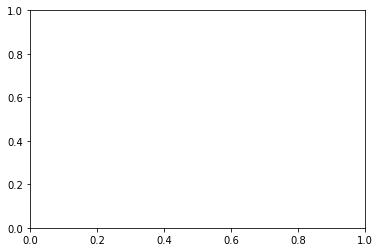

In [ ]:
## Check for counties with outlying total population
population.boxplot(column=['Adult Population'], grid=False)

In [ ]:
## split the county and state and merge with fips codes
population_split = population['County'].str.split(", ", expand=True)
population_split.columns = ['county', 'state']
population = pd.concat([population.drop("County", axis=1), population_split], axis=1)
population = pd.merge(population, FIPS_codes, left_on=['county', 'state'], right_on=['County', 'State'])  # Merge with FIPS

In [ ]:
population.head()

,Adult Population,county,state,FIPS,State,County,Merge,State Abbrv
0,43953,Autauga County,Alabama,1001,Alabama,Autauga County,Alabama Autauga County,AL
1,172297,Baldwin County,Alabama,1003,Alabama,Baldwin County,Alabama Baldwin County,AL
2,20636,Barbour County,Alabama,1005,Alabama,Barbour County,Alabama Barbour County,AL
3,18492,Bibb County,Alabama,1007,Alabama,Bibb County,Alabama Bibb County,AL
4,45907,Blount County,Alabama,1009,Alabama,Blount County,Alabama Blount County,AL


In [ ]:
population[population['FIPS'] < 0 ].count()

Adult Population    0
county              0
state               0
FIPS                0
State               0
County              0
Merge               0
State Abbrv         0
dtype: int64

In [ ]:
## read in the labor data
labor = pd.read_excel('covid_community_vulnerability/data/economic_harm/unemployed.xlsx', skiprows=5, skipfooter=3, usecols=['Unnamed: 3', 'Unnamed: 6'])

In [ ]:
labor.head()

,Unnamed: 3,Unnamed: 6
0,"Autauga County, AL",26172
1,"Baldwin County, AL",97328
2,"Barbour County, AL",8537
3,"Bibb County, AL",8685
4,"Blount County, AL",25331


In [ ]:
## clean it up: rename columns, split into state and county, rename counties as needed
labor = labor.rename(columns={'Unnamed: 3': 'County', 'Unnamed: 6': 'Labor Force'})
labor_split = labor['County'].str.split(", ", expand=True)
labor_split.columns = ['county', 'state']
labor = pd.concat([labor.drop("County", axis=1), labor_split], axis=1)
labor.loc[(labor['county'] == 'District of Columbia'), 'state']  = 'DC'

labor.loc[(labor.county == 'Anchorage Borough/municipality'), 'county'] = 'Anchorage Municipality'
labor.loc[(labor.county == 'Juneau Borough/city'), 'county'] = 'Juneau City and Borough'
labor.loc[(labor.county == 'Sitka Borough/city'), 'county'] = 'Sitka City and Borough'
labor.loc[(labor.county == 'Wrangell Borough/city'), 'county'] = 'Wrangell City and Borough'
labor.loc[(labor.county == 'Yakutat Borough/city'), 'county'] = 'Yakutat City and Borough'
labor.loc[(labor.county == 'San Francisco County/city'), 'county'] = 'San Francisco County'
labor.loc[(labor.county == 'Broomfield County/city'), 'county'] = 'Broomfield County'
labor.loc[(labor.county == 'Denver County/city'), 'county'] = 'Denver County'
labor.loc[(labor.county == 'Honolulu County/city'), 'county'] = 'Honolulu County'
labor.loc[(labor.county == 'Nantucket County/town'), 'county'] = 'Nantucket County'
labor.loc[(labor.county == 'Philadelphia County/city'), 'county'] = 'Philadelphia County'

In [ ]:
## merge with the population data
labor = pd.merge(labor, population, left_on=['county', 'state'], right_on=['County', 'State Abbrv'])  # Merge with FIPS

In [ ]:
labor.head()

,Labor Force,county_x,state_x,Adult Population,county_y,state_y,FIPS,State,County,Merge,State Abbrv
0,26172,Autauga County,AL,43953,Autauga County,Alabama,1001,Alabama,Autauga County,Alabama Autauga County,AL
1,97328,Baldwin County,AL,172297,Baldwin County,Alabama,1003,Alabama,Baldwin County,Alabama Baldwin County,AL
2,8537,Barbour County,AL,20636,Barbour County,Alabama,1005,Alabama,Barbour County,Alabama Barbour County,AL
3,8685,Bibb County,AL,18492,Bibb County,Alabama,1007,Alabama,Bibb County,Alabama Bibb County,AL
4,25331,Blount County,AL,45907,Blount County,Alabama,1009,Alabama,Blount County,Alabama Blount County,AL


In [ ]:
## calculate percentage not in labor force
labor['% Not in Labor Force'] = (1 - (labor['Labor Force'].astype(float)/labor['Adult Population'].astype(float)))*100

In [ ]:
## drop extra columns
labor = labor[['FIPS', '% Not in Labor Force']]

In [ ]:
labor.head()

,FIPS,% Not in Labor Force
0,1001,40.454576
1,1003,43.511495
2,1005,58.630549
3,1007,53.033744
4,1009,44.821051


In [ ]:
## check for missing values
fips_unique=labor['FIPS'].unique()
missing_fips(fips_unique)

missing FIPS codes:
35013


In [ ]:
## missing two FIPS so we'll merge left and fill NaN with 0
data_clean = pd.merge(data_clean, labor, left_on='FIPS', right_on='FIPS', how='left')

In [ ]:
near_Dona_Ana = 0

near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35029, '% Not in Labor Force']) # Luna County
near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35051, '% Not in Labor Force']) # Sierra County
near_Dona_Ana += float(data_clean.loc[data_clean['FIPS']==35035, '% Not in Labor Force']) # Otero County
near_Dona_Ana_mean = near_Dona_Ana/3

print(near_Dona_Ana_mean)
# print(data_clean['% Not in Labor Force'].mean())

51.73764024134155


In [ ]:
data_clean.loc[data_clean['FIPS']==35013, '% Not in Labor Force'] = near_Dona_Ana_mean

### Jobs in Tourism/Leisure/Hospitality

In [ ]:
## read in the data and select only county info
industries = pd.read_excel('covid_community_vulnerability/data/economic_harm/industries.xlsx')
industries = industries.loc[(industries['Area Type'] == 'County')]

In [ ]:
industries.head()

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
35,01001,01,1.0,0,10,2019,A,County,Alabama,"Autauga County, Alabama",Total Covered,"10 Total, all industries",NaN,888,11107,448078198,776,40344,1.00,1.00
36,01001,01,1.0,1,10,2019,A,County,Alabama,"Autauga County, Alabama",Federal Government,"10 Total, all industries",NaN,12,82,4466579,1043,54250,0.39,0.37
37,01001,01,1.0,2,10,2019,A,County,Alabama,"Autauga County, Alabama",State Government,"10 Total, all industries",NaN,19,582,25879210,856,44491,1.66,1.73
38,01001,01,1.0,3,10,2019,A,County,Alabama,"Autauga County, Alabama",Local Government,"10 Total, all industries",NaN,32,1911,73489430,740,38458,1.79,1.90
39,01001,01,1.0,5,10,2019,A,County,Alabama,"Autauga County, Alabama",Private,"10 Total, all industries",NaN,825,8532,344242979,776,40349,0.90,0.90


In [ ]:
# select only the leisure and hospitality data and the full employment data
totals = industries.loc[(industries['Industry'] == '10 Total, all industries') & (industries['Ownership'] == 'Total Covered')]
leisure = industries.loc[(industries['Industry'] == '1026 Leisure and hospitality')]
leisure = pd.merge(leisure, totals, left_on='Area\nCode', right_on='Area\nCode')

In [ ]:
## calculate the percentage in leisure and hospitality and drop extra info
leisure['% Jobs in Leisure and Hospitality'] = leisure['Annual Average Employment_x']/leisure['Annual Average Employment_y']*100
leisure = leisure[['Area\nCode', '% Jobs in Leisure and Hospitality']]

In [ ]:
## check for missing values
leisure['Area\nCode']=leisure['Area\nCode'].astype(int)
fips_unique=leisure['Area\nCode'].unique()
missing_fips(fips_unique)

missing FIPS codes:
13101
13265
13307
21201
28009
31113
31117
48033
48269


In [ ]:
## missing two FIPS so we'll merge left and fill NaN with average
data_clean = pd.merge(data_clean, leisure, left_on='FIPS', right_on='Area\nCode', how='left')
data_clean = data_clean.drop(columns = ['Area\nCode'])
print(leisure_hospitality_average)

9.777449699701583


In [ ]:
## 13101 Echols County
jobs_near_Echols = 0

jobs_near_Echols += float(data_clean.loc[data_clean['FIPS']==13173, '% Jobs in Leisure and Hospitality']) # Lanier County
jobs_near_Echols += float(data_clean.loc[data_clean['FIPS']==13185, '% Jobs in Leisure and Hospitality']) # Lowndes County
jobs_near_Echols += float(data_clean.loc[data_clean['FIPS']==13065, '% Jobs in Leisure and Hospitality']) # Clinch County
jobs_near_Echols_mean = jobs_near_Echols/3

print(jobs_near_Echols_mean)

data_clean.loc[data_clean['FIPS'] == 13101, '% Jobs in Leisure and Hospitality'] = jobs_near_Echols_mean

9.840781243960972


In [ ]:
## 13265 Taliaferro County
jobs_near_Taliaferro = 0

jobs_near_Taliaferro += float(data_clean.loc[data_clean['FIPS']==13133, '% Jobs in Leisure and Hospitality']) # Greene County
jobs_near_Taliaferro += float(data_clean.loc[data_clean['FIPS']==13317, '% Jobs in Leisure and Hospitality']) # Wilkes County
jobs_near_Taliaferro += float(data_clean.loc[data_clean['FIPS']==13301, '% Jobs in Leisure and Hospitality']) # Warren County
jobs_near_Taliaferro_mean = jobs_near_Taliaferro/3

print(jobs_near_Taliaferro_mean)

data_clean.loc[data_clean['FIPS'] == 13265, '% Jobs in Leisure and Hospitality'] = jobs_near_Taliaferro_mean

7.504088747585517


In [ ]:
## 13307	Webster County
jobs_near_Webster = 0

jobs_near_Webster += float(data_clean.loc[data_clean['FIPS']==13259, '% Jobs in Leisure and Hospitality']) # Stewart County
jobs_near_Webster += float(data_clean.loc[data_clean['FIPS']==13197, '% Jobs in Leisure and Hospitality']) # Marion County
jobs_near_Webster += float(data_clean.loc[data_clean['FIPS']==13261, '% Jobs in Leisure and Hospitality']) # Sumter County
jobs_near_Webster_mean = jobs_near_Webster/3

print(jobs_near_Webster_mean)

data_clean.loc[data_clean['FIPS'] == 13307, '% Jobs in Leisure and Hospitality'] = jobs_near_Webster_mean

4.2963051511713966


In [ ]:
## 21201 Robertson County
jobs_near_Robertson = 0

jobs_near_Robertson += float(data_clean.loc[data_clean['FIPS']==21023, '% Jobs in Leisure and Hospitality']) # Bracken County
jobs_near_Robertson += float(data_clean.loc[data_clean['FIPS']==21161, '% Jobs in Leisure and Hospitality']) # Mason County
jobs_near_Robertson += float(data_clean.loc[data_clean['FIPS']==21181, '% Jobs in Leisure and Hospitality']) # Nicholas County
jobs_near_Robertson_mean = jobs_near_Robertson/3

print(jobs_near_Robertson_mean)

data_clean.loc[data_clean['FIPS'] == 21201, '% Jobs in Leisure and Hospitality'] = jobs_near_Robertson_mean

8.70204691374779


In [ ]:
## 28009 Benton County
jobs_near_Benton = 0

jobs_near_Benton += float(data_clean.loc[data_clean['FIPS']==28139, '% Jobs in Leisure and Hospitality']) # Tippah County
jobs_near_Benton += float(data_clean.loc[data_clean['FIPS']==28093, '% Jobs in Leisure and Hospitality']) # Marshall County
jobs_near_Benton_mean = jobs_near_Benton/2

print(jobs_near_Benton_mean)

data_clean.loc[data_clean['FIPS'] == 28009, '% Jobs in Leisure and Hospitality'] = jobs_near_Benton_mean

4.9396982734118975


In [ ]:
## 31113 Logan county
jobs_near_Logan = 0

jobs_near_Logan += float(data_clean.loc[data_clean['FIPS']==31171, '% Jobs in Leisure and Hospitality']) # Thomas County
jobs_near_Logan += float(data_clean.loc[data_clean['FIPS']==31041, '% Jobs in Leisure and Hospitality']) # Custer County
jobs_near_Logan += float(data_clean.loc[data_clean['FIPS']==31111, '% Jobs in Leisure and Hospitality']) # Lincoln County
jobs_near_Logan_mean = jobs_near_Logan/3

print(jobs_near_Logan_mean)

data_clean.loc[data_clean['FIPS'] == 31113, '% Jobs in Leisure and Hospitality'] = jobs_near_Logan_mean

7.21895513405168


In [ ]:
## 31117 McPherson County
jobs_near_McPherson = 0

jobs_near_McPherson += float(data_clean.loc[data_clean['FIPS']==31091, '% Jobs in Leisure and Hospitality']) # Hooker County
jobs_near_McPherson += float(data_clean.loc[data_clean['FIPS']==31005, '% Jobs in Leisure and Hospitality']) # Arthur County
jobs_near_McPherson += float(data_clean.loc[data_clean['FIPS']==31111, '% Jobs in Leisure and Hospitality']) # Lincoln County
jobs_near_McPherson += float(data_clean.loc[data_clean['FIPS']==31101, '% Jobs in Leisure and Hospitality']) # Keith County
jobs_near_McPherson_mean = jobs_near_McPherson/4

print(jobs_near_McPherson_mean)

data_clean.loc[data_clean['FIPS'] == 31117, '% Jobs in Leisure and Hospitality'] = jobs_near_McPherson_mean

18.307426543348562


In [ ]:
## 48033 Oakland County
jobs_near_Oakland = 0

jobs_near_Oakland += float(data_clean.loc[data_clean['FIPS']==26087, '% Jobs in Leisure and Hospitality']) # Lapeer County
jobs_near_Oakland += float(data_clean.loc[data_clean['FIPS']==26049, '% Jobs in Leisure and Hospitality']) # Genesee County
jobs_near_Oakland += float(data_clean.loc[data_clean['FIPS']==26093, '% Jobs in Leisure and Hospitality']) # Livingston County
jobs_near_Oakland += float(data_clean.loc[data_clean['FIPS']==26161, '% Jobs in Leisure and Hospitality']) # Washtenaw County
jobs_near_Oakland += float(data_clean.loc[data_clean['FIPS']==26163, '% Jobs in Leisure and Hospitality']) # Wayne County
jobs_near_Oakland += float(data_clean.loc[data_clean['FIPS']==26099, '% Jobs in Leisure and Hospitality']) # Macomb County
jobs_near_Oakland_mean = jobs_near_Oakland/6

print(jobs_near_Oakland_mean)

data_clean.loc[data_clean['FIPS'] == 48033, '% Jobs in Leisure and Hospitality'] = jobs_near_Oakland_mean

10.779527393419059


In [ ]:
## 48269 King County, TX
jobs_near_King = 0

jobs_near_King += float(data_clean.loc[data_clean['FIPS']==48125, '% Jobs in Leisure and Hospitality']) # Dickens County
jobs_near_King += float(data_clean.loc[data_clean['FIPS']==48101, '% Jobs in Leisure and Hospitality']) # Cottle County
jobs_near_King += float(data_clean.loc[data_clean['FIPS']==48275, '% Jobs in Leisure and Hospitality']) # Knox County
jobs_near_King += float(data_clean.loc[data_clean['FIPS']==48433, '% Jobs in Leisure and Hospitality']) # Stonewall County
jobs_near_King_mean = jobs_near_King/4

print(jobs_near_King_mean)

data_clean.loc[data_clean['FIPS'] == 48269, '% Jobs in Leisure and Hospitality'] = jobs_near_King_mean

5.597778077507081


### Part Time Workers

In [ ]:
## read in the data
part_time = pd.read_csv('covid_community_vulnerability/data/economic_harm/part-time.csv', usecols=['NAME', 'S2303_C01_001E', 'S2303_C01_009E'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
## clean it up
part_time = part_time.rename(columns={'NAME':'County', 'S2303_C01_001E':'Total Population', 'S2303_C01_009E':'Not Part-Time'})
part_time = part_time.drop(0, axis=0)

In [ ]:
## calculate part time percentage
part_time['% Part-time'] = 100 - (part_time['Not Part-Time'].astype(float)/part_time['Total Population'].astype(float))*100

In [ ]:
## merge in the FIPS codes (first split into county and state)
part_time_split = part_time.County.str.split(", ", expand=True)
part_time_split.columns = ['county', 'state']
part_time=pd.concat([part_time.drop('County', axis=1), part_time_split], axis=1)
part_time = pd.merge(part_time, FIPS_codes, left_on=['county', 'state'], right_on=['County', 'State'])

In [ ]:
## drop extra columns
part_time=part_time[['FIPS','% Part-time']]

In [ ]:
part_time.head()

,FIPS,% Part-time
0,1001,39.604710
1,1003,40.364194
2,1005,54.696722
3,1007,52.112959
4,1009,47.550659


In [ ]:
## check for missing values
fips_unique=part_time['FIPS'].unique()
missing_fips(fips_unique)

missing FIPS codes:


In [ ]:
## all good so we can go ahead and merge
data_clean = pd.merge(data_clean, part_time, left_on=['FIPS'], right_on=['FIPS'],how='left')

In [ ]:
## check for missing values
fips_unique=data_clean['FIPS'].unique()
missing_fips(fips_unique)
data_clean.shape[0]

missing FIPS codes:


3142

## Comparing Total Population

In [ ]:
data_clean.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,Primary Care Physicians Rate,Dentist Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,% Drive Alone to Work,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Death Rate,Child Mortality Rate,Infant Mortality Rate,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured,% Children Uninsured,Other Primary Care Provider Ratio,% Disconnected Youth,Average Reading Performance,Average Math Performance,Median Household Income,% Enrolled in Free or Reduced Lunch,Black/White Segregation Index,non-White/White Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,% Homeowners,% Severe Housing Cost Burden,Population,% less than 18 years of age,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,internet_consumer,internet_nonconsumer,internet_all,internet_hhs,internet_ratio,internet_percent,covid_cases,covid_deaths,% Adults 65 and Older,% Nonwhite,% households wo car,Number of Hospitals,% workers commuting by public transit,opioid death rate,Unemployment Rate,% Not in Labor Force,% Jobs in Leisure and Hospitality,% Part-time
0,1001,Alabama,Autauga,791.0,8128.591190,20.882987,4.743889,4.654031,8.619529,18.081557,33.3,7.2,34.7,69.130124,15.026031,26.785714,407.2,25.284927,45.04180,32.37352,41.0,41.0,90.000000,62.009974,19.3,5.234597,26.242679,12.071202,272.282220,68.526994,11.7,No,14.663462,86.523661,39.6,76.879477,417.547551,55.922156,7.940109,14.129347,11.1,219.1,13.2,11.991125,10.809447,19.328751,35.905406,11.148989,2.669154,2527:1,NaN,2.959586,2.802699,59338.0,43.408673,24.619138,23.628395,4.896617,18.145295,16.230078,10.625000,74.894625,13.403481,55601,23.674035,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162,16.000000,1.000000,17.0,21.054,0.750000,75.0000,18511,228.0,15.973,23.121377,0.056569,1.0,0.1,8.992644,2.7,40.454576,14.216260,39.604710
1,1003,Alabama,Baldwin,2967.0,7354.122530,17.509134,4.224519,4.304056,8.345003,17.489033,31.0,8.0,26.5,73.713549,17.958310,30.769231,325.0,27.880692,72.89727,49.53629,43.0,44.0,86.361577,67.371620,13.9,4.417767,24.139601,10.205617,203.660396,72.385054,10.3,No,13.566201,84.282433,41.7,78.450258,353.343111,47.381750,5.546701,13.475336,10.7,166.5,11.6,5.424427,13.610487,15.811239,33.305868,14.348525,3.538763,1787:1,8.476795,3.005642,2.860696,57588.0,48.486565,41.271763,31.825343,3.008333,19.377511,14.093514,26.192661,73.619343,11.725808,218022,21.607911,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099,70.000000,9.000000,80.0,76.133,0.920000,92.0000,65973,716.0,20.978,13.733800,0.035530,4.0,0.1,6.421370,2.7,43.511495,20.823355,40.364194
2,1005,Alabama,Barbour,472.0,10253.573403,29.591802,5.430279,5.185594,11.474559,21.999985,41.7,5.6,23.5,53.166770,12.844016,40.000000,716.3,40.870815,31.65809,36.17218,45.0,37.0,81.410256,34.857649,43.9,5.681410,56.603426,7.518797,414.277861,70.274612,11.5,No,14.583333,83.368470,32.2,75.341935,497.350062,74.225274,NaN,16.586252,17.6,420.6,22.0,10.739667,NaN,22.854780,38.563167,16.085834,2.913534,1914:1,13.339302,2.660388,2.443271,34382.0,63.292302,25.039132,